## k-means clustering

In [4]:
import pandas as pd

gp2_carburant = pd.read_csv("/Users/abdelwahed/Mise-en-place-dun-detecteur-de-fraude-de-carburant/gp2_carburant_transformed_diff_date.csv",delimiter=',')
gp2_carburant.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date
0,167,2022-09-01,33.52,0,1407051734,2,41,8.0
1,167,2022-09-07,27.93,0,1407051734,2,111,6.0
2,167,2022-09-15,22.35,0,1407051734,2,111,8.0
3,167,2022-10-01,26.88,0,1407051734,2,118,16.0
4,167,2022-10-10,26.88,0,1407051734,2,111,9.0


In [64]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
    
#data1 = gp2_carburant[gp2_carburant['matricule']  == 230]
data = gp2_carburant[['quantite','type_carburant']]
#data = data [data['matricule']  == 230]

def train_kmeans (nbr_cluster) :
    
    # Créer un objet KMeans
    kmeans = KMeans(n_clusters = nbr_cluster)

    # Adapter le modèle aux données
    y_kmeans = kmeans.fit_predict(data)
    
    return kmeans.labels_

y_kmeans = train_kmeans(3)
# Calculer la métrique de silhouette
silhouette_avg = silhouette_score(data, y_kmeans)

print("La métrique de silhouette moyenne est :", silhouette_avg)
# Prédire les clusters pour chaque point de données
#y_kmeans = kmeans.predict(data)

# Calculer les distances entre chaque point et son centroïde
#distances = kmeans.transform(data)

# Calculer les distances maximales pour chaque cluster
#max_distances = np.max(distances, axis=1)

# Définir un seuil pour détecter les anomalies (par exemple, les points avec une distance maximale supérieure à un certain quantile)
#seuil_anomalie = np.percentile(max_distances, 50)

# Trouver les indices des points considérés comme des anomalies
#indices_anomalies = np.where(max_distances > seuil_anomalie)[0]

#print("Indices des anomalies:", indices_anomalies)


La métrique de silhouette moyenne est : 0.7231342647290284


In [6]:
dataframe = data.iloc[indices_anomalies]

In [7]:
dataframe

,quantite,type_carburant,typePaiement,fournisseur,diff_date
2,22.35,2,1407051734,0,8.0
3,26.88,2,1407051734,0,16.0
4,26.88,2,1407051734,0,9.0
5,26.88,2,1407051734,0,9.0
6,26.88,2,1407051734,0,14.0
...,...,...,...,...,...
7930,0.35,3,1407058655,0,4.0
7931,34.01,3,1407058655,0,5.0
7932,29.48,3,1407058655,0,3.0
7933,31.75,3,1407058655,0,5.0


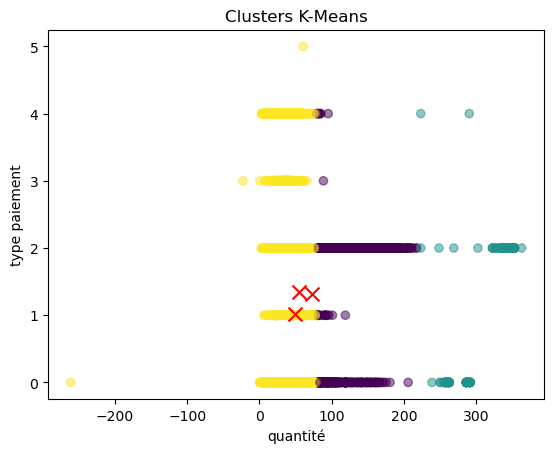

In [65]:
import matplotlib.pyplot as plt

data = np.array(data)

# Tracer les points de données avec les clusters colorés
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, cmap='viridis', alpha=0.5)
# Tracer les centroïdes
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title('Clusters K-Means')
plt.xlabel('quantité')
plt.ylabel('type paiement')
plt.show()

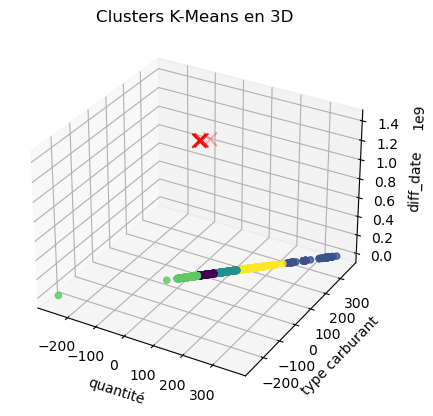

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#data = gp2_carburant[['quantite','type_carburant','typePaiement','fournisseur','diff_date']]

# Tracer les points de données avec les clusters colorés
ax.scatter(data[:, 0], data[:, 0], data[:, 2], c=y_kmeans, cmap='viridis', alpha=0.8)
# Tracer les centroïdes
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=100)

# Définir les labels des axes
ax.set_xlabel('quantité')
ax.set_ylabel('type carburant')
ax.set_zlabel('diff_date')

plt.title('Clusters K-Means en 3D')
plt.show()

### Evaluation de k-means

In [39]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [44]:
n_clusters = [2,3,4,5,6,7]
for element in n_clusters :
    print("Le nombre de cluster est :", element)
    res = train_kmeans (element)
    # Calculer la métrique de silhouette
    silhouette_avg = silhouette_score(data, res)

    print("La métrique de silhouette moyenne est :", silhouette_score(data, res))

Le nombre de cluster est : 2
La métrique de silhouette moyenne est : 0.7328226309773777
Le nombre de cluster est : 3
La métrique de silhouette moyenne est : 0.8209657087906288
Le nombre de cluster est : 4
La métrique de silhouette moyenne est : 0.8569694034089267
Le nombre de cluster est : 5
La métrique de silhouette moyenne est : 0.8621873199018647
Le nombre de cluster est : 6
La métrique de silhouette moyenne est : 0.7827880255857619
Le nombre de cluster est : 7
La métrique de silhouette moyenne est : 0.7855046908466873


In [ ]:
data

### ------------------Imporved Isolation Forest - with clustering stage before Isolation Forest--------------------------

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

class ImprovedIsolationForest:
    def __init__(self, n_estimators=20, contamination='auto', n_clusters=2):
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.n_clusters = n_clusters
        self.cluster_models = []
        self.isolation_forest_models = []
    
    def fit(self, X):
        # Créer et entraîner les modèles de clustering pour chaque arbre
        for _ in range(self.n_estimators):
            cluster_model = KMeans(n_clusters=self.n_clusters)
            cluster_labels = cluster_model.fit_predict(X)
            self.cluster_models.append((cluster_model, cluster_labels))
        
        # Utiliser les clusters pour filtrer les données dans chaque arbre
        for cluster_model, cluster_labels in self.cluster_models:
            for label in set(cluster_labels):
                # Sélectionner les données appartenant au cluster actuel
                
                cluster_data = X[cluster_labels == label]
                print("cluster data :",cluster_data)
                # Créer un modèle Isolation Forest pour chaque sous-ensemble de données
                isolation_forest_model = IsolationForest(contamination=self.contamination)
                isolation_forest_model.fit(cluster_data)
                self.isolation_forest_models.append(isolation_forest_model)
    
    def predict(self, X):
        # Faire des prédictions avec chaque modèle Isolation Forest
        all_predictions = []
        for isolation_forest_model in self.isolation_forest_models:
            predictions = isolation_forest_model.predict(X)
            all_predictions.append(predictions)
        # Agréger les prédictions de tous les modèles
        aggregated_predictions = sum(all_predictions) / len(all_predictions)
        print('aggregated_predictions : ',aggregated_predictions)
        # Convertir les prédictions en anomalies (-1) ou non anomalies (1)
        return (aggregated_predictions == -1).astype(int)



In [10]:

# Créer une instance du modèle ImprovedIsolationForest avec les hyperparamètres appropriés
model = ImprovedIsolationForest(n_estimators=20, contamination='auto', n_clusters=2)

# Entraîner le modèle sur vos données d'entraînement
model.fit(data)

# Faire des prédictions sur vos données de test
predictions = model.predict(data)

# Utiliser les prédictions pour identifier les anomalies dans vos données
anomalies = data[predictions == -1]

# Vous pouvez ensuite analyser les anomalies identifiées pour comprendre les raisons de leur détection



cluster data : [[4.67800000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [4.77300000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [5.06000000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.26700000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [9.57200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [6.95200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  8.00000000e+00]]
cluster data : [[3.35200000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 [2.79300000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  6.00000000e+00]
 [2.23500000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.94800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  3.00000000e+00]
 [3.17500000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  5.00000000e+00]
 [3.62800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  4.00000000e+00]

cluster data : [[3.35200000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 [2.79300000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  6.00000000e+00]
 [2.23500000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.94800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  3.00000000e+00]
 [3.17500000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  5.00000000e+00]
 [3.62800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  4.00000000e+00]]
cluster data : [[4.67800000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [4.77300000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [5.06000000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.26700000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [9.57200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [6.95200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  8.00000000e+00]

cluster data : [[3.35200000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 [2.79300000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  6.00000000e+00]
 [2.23500000e+01 2.00000000e+00 1.40705173e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.94800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  3.00000000e+00]
 [3.17500000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  5.00000000e+00]
 [3.62800000e+01 3.00000000e+00 1.40705866e+09 0.00000000e+00
  4.00000000e+00]]
cluster data : [[4.67800000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [4.77300000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  7.00000000e+00]
 [5.06000000e+01 0.00000000e+00 1.40700472e+09 0.00000000e+00
  8.00000000e+00]
 ...
 [2.26700000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [9.57200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  4.00000000e+00]
 [6.95200000e+01 2.00000000e+00 1.40702292e+09 0.00000000e+00
  8.00000000e+00]

In [90]:
anomalies

,matricule,quantite,type_carburant,typePaiement,fournisseur,diff_date


### KNN 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [124]:
data

,matricule,quantite,type_carburant,typePaiement,fournisseur,diff_date
142,230,78.09,2,1407018303,0,1.0
143,230,86.65,2,1407018303,0,2.0
144,230,69.02,2,1407018303,0,3.0
145,230,77.08,2,1407018303,0,4.0
146,230,83.12,2,1407018303,0,4.0
...,...,...,...,...,...,...
202,230,176.32,2,1407018303,0,8.0
203,230,176.32,2,1407018303,0,4.0
204,230,168.77,2,1407018303,0,3.0
205,230,176.32,2,1407018303,0,6.0


In [145]:
# create model
nbrs = NearestNeighbors(n_neighbors = 20)
# fit model
nbrs.fit(data)

NearestNeighbors(n_neighbors=20)

In [158]:
nbrs

NearestNeighbors(n_neighbors=20)

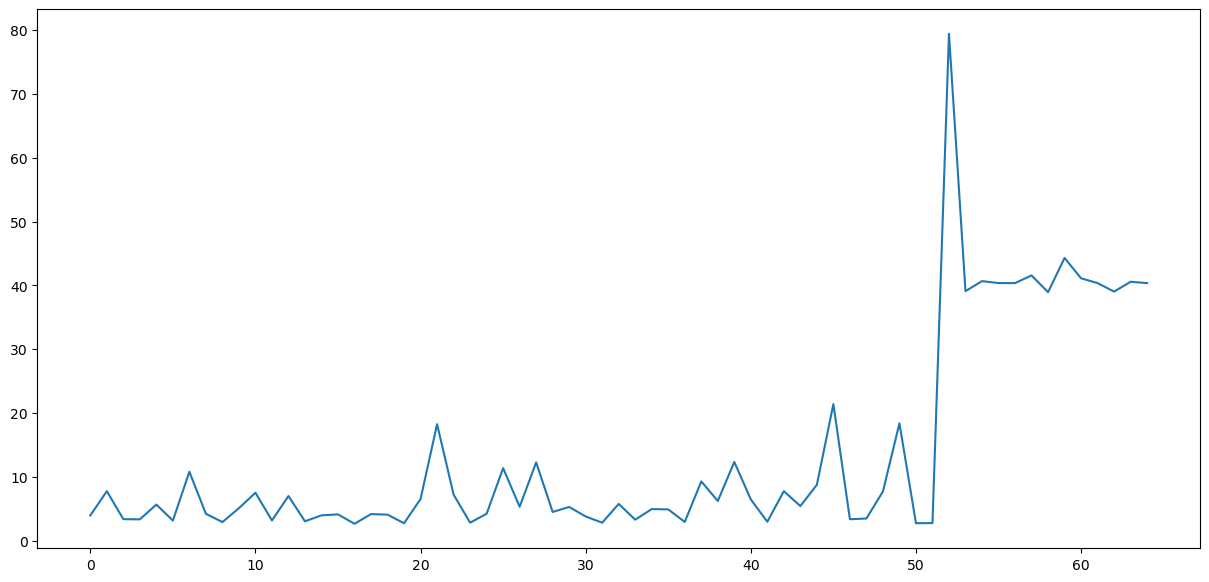

In [146]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(data)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [147]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0      3.935280
1      7.737593
2      3.353634
3      3.321488
4      5.642882
        ...    
60    41.107579
61    40.352823
62    39.021338
63    40.565053
64    40.352823
Length: 65, dtype: float64

In [148]:
distances_mean.describe()

count    65.000000
mean     13.586287
std      16.248351
min       2.629093
25%       3.457205
50%       5.642882
75%      12.318468
max      79.435753
dtype: float64

In [155]:
th =12
outlier_index = np.where(distances_mean > th)
outlier_index

(array([21, 27, 39, 45, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64]),)

In [156]:
outlier_values = data1.iloc[outlier_index]
outlier_values

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date
163,230,2023-08-02,40.30,0,1407018303,2,108,1.0
169,230,2023-08-24,47.86,0,1407018303,2,108,2.0
181,230,2023-09-29,47.86,0,1407018303,2,108,3.0
187,230,2023-10-11,36.78,0,1407018303,2,29,1.0
191,230,2023-10-19,99.24,0,1407018303,2,29,1.0
194,230,2024-01-11,133.50,0,1407018303,2,122,77.0
195,230,2024-01-16,151.13,0,1407018303,2,118,5.0
196,230,2024-01-19,176.42,0,1407018303,2,29,3.0
197,230,2024-01-25,125.94,0,1407018303,2,108,6.0
198,230,2024-01-29,176.32,0,1407018303,2,59,4.0


### Visualiser les anomalies

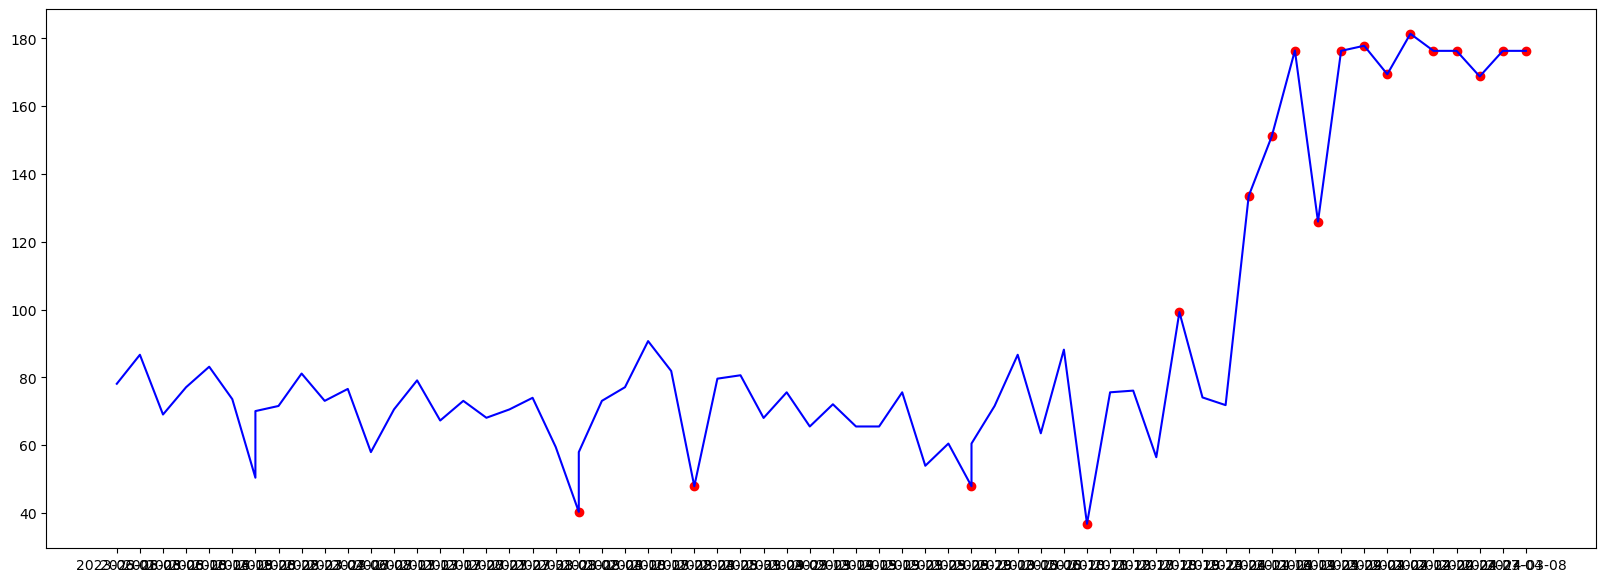

In [157]:
# plot data
plt.figure(figsize=(20, 7))
plt.plot(data1["date"], data1["quantite"], color = "b")
# plot outlier values
plt.scatter(outlier_values["date"], outlier_values["quantite"], color = "r")